# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [3]:
citi_data_original = pd.read_csv("../output_data/cities.csv", dtype="object", encoding="utf-8")

citi_data_original

#types_df = pd.read_csv("../Resources/ethnic_restr.csv")
#cities_df = pd.read_csv(output_data_file)
#cities_df.head()

#cities_df = pd.DataFrame(cities)
#for k, v in cities_df.interows():
#    print(k)
#    print(v)

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.5,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.7,78.8,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.2,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.6,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.6,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.2,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.0,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [4]:
cities_df = pd.DataFrame(citi_data_original)
type(cities_df.Lat)

pandas.core.series.Series

In [5]:
cities

['rawson',
 'petatlan',
 'chokurdakh',
 'toliary',
 'calvinia',
 'palmer',
 'yar-sale',
 'rikitea',
 'jamestown',
 'ilulissat',
 'utiroa',
 'sile',
 'kontagora',
 'ushuaia',
 'mataura',
 'mys shmidta',
 'hobart',
 'eskisehir',
 'hithadhoo',
 'samusu',
 'kaitangata',
 'puerto ayora',
 'bluff',
 'praia',
 'nelson bay',
 'illoqqortoormiut',
 'punta arenas',
 'thanh hoa',
 'sinnamary',
 'komsomolskiy',
 'ballina',
 'ancud',
 'hilo',
 'iqaluit',
 'port elizabeth',
 'east london',
 'albany',
 'avarua',
 'nikolskoye',
 'kapaa',
 'qaanaaq',
 'belushya guba',
 'ciudad ojeda',
 'samarai',
 'kaspiysk',
 'talakan',
 'fairbanks',
 'busselton',
 'vaitupu',
 'jalu',
 'luderitz',
 'khatanga',
 'castro',
 'podgorenskiy',
 'hamilton',
 'palabuhanratu',
 'butembo',
 'maniitsoq',
 'saldanha',
 'aklavik',
 'atuona',
 'victoria',
 'mehamn',
 'thompson',
 'carnarvon',
 'ayabaca',
 'portland',
 'koumac',
 'upernavik',
 'valverde del camino',
 'barentsburg',
 'corbii mari',
 'saint-philippe',
 'barrow',
 'taol

In [6]:
# Mean, median, mode for Poverty Rate
cities_mean = round(cities_df['Max Temp'].astype('float').mean(), 2)
cities_median = round(cities_df['Max Temp'].astype('float').median(), 2)
cities_mode = round(cities_df['Max Temp'].astype('float').mode(), 2)
#cities_mode = round(cities_df['Max Temp'].astype('float').cov(), 2)
#mperature Mean: {cities_mean}")
print(f"Cities Temperature Mean {cities_mean}")
print(f"Cities Temperature Median {cities_median}")
print(f"Cities Temperature mode {cities_mode}")
print(f"Cities Temperature covariance {cities_mode.cov}")

Cities Temperature Mean 64.97
Cities Temperature Median 64.99
Cities Temperature mode 0    59.0
dtype: float64
Cities Temperature covariance <bound method Series.cov of 0    59.0
dtype: float64>


In [7]:
#cities_mode.cov
#cities_mode.corr(method='pearson')
cities_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.5,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.7,78.8,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.2,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.6,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.6,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.2,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.0,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [8]:
v1 = lambda x:float(x[1:-1])

In [9]:
 #floatg_cities = cities_df.replace('[^\d.]','',regex = True).astype(float)
    # dice que ValueError: could not convert string to float:
    
     #def process_weather_vals(self):
     #   self.cities_df['New York, NY Humidity'] = self.weatherdf['New York, NY Humidity'].astype(str)
     #   self.weatherdf['New York, NY Temp'] = self.weatherdf['New York, NY Temp'].astype(str)
     #   self.weatherdf['New York, NY Humidity'] = self.weatherdf['New York, NY Humidity'].map(lambda x: ''.join([i for i in x if i.isdigit()]))
     #   self.weatherdf['New York, NY Temp'] = self.weatherdf['New York, NY Temp'].map(lambda x: ''.join([i for i in x if i.isdigit()]))
     #   self.weatherdf['New York, NY Humidity'] = self.weatherdf['New York, NY Humidity'].apply(lambda x: float(x))
     #   self.weatherdf['New York, NY Temp'] = self.weatherdf['New York, NY Temp'].apply(lambda x: float(x))
    
cities_df['Max Temp'] = cities_df['Max Temp'].apply(lambda x:float(x))
#cities_df['Max Temp'].dtypes
#cities_df['Lat']
cities_df['Lat'] = cities_df['Lat'].apply(lambda x:float(x))
#cities_df['Lat'].dtypes
cities_df['Humidity'] = cities_df['Humidity'].apply(lambda x:float(x))
cities_df['Cloudiness'] = cities_df['Cloudiness'].apply(lambda x:float(x))
cities_df['Wind Speed'] = cities_df['Wind Speed'].apply(lambda x:float(x))

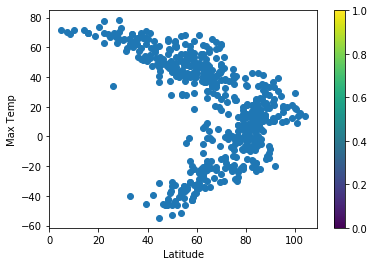

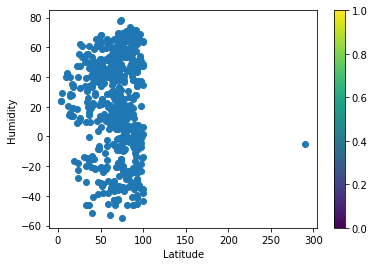

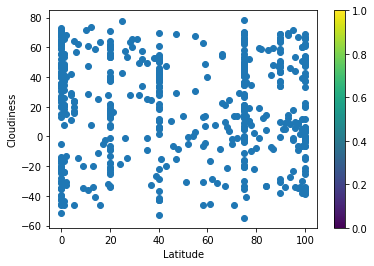

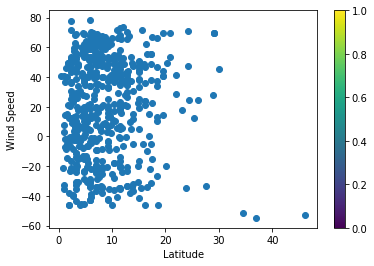

In [10]:
#Temperature (F) vs. Latitude

# Max Temp 
plt.scatter(cities_df['Max Temp'],cities_df['Lat']) #c=cities_df['Max Temp']  RGBA values should be within 0-1 range
clb = plt.colorbar()
plt.xlabel("Latitude")
plt.ylabel('Max Temp')
plt.show()
#----------------------------------------------------------------------------------------------
#Para valores mas altos de temp se registran en rangos de latitud cercanos a 0 a 60 describiendo una relacion inversa 
#de frecuencia, y para valores de temp bajos (-57 a 20) se registran valores crecientes en temperatura que van 
#de -57 a casi 40 para valores de latitud creciente desde 40 hasta 100.


#Humidity vs. Latitude
plt.scatter(cities_df['Humidity'],cities_df["Lat"])
clb = plt.colorbar()
plt.xlabel("Latitude")
plt.ylabel('Humidity')
plt.show()
# Se registran valores constantes de humedad en rangos de latitudes que van de 10 a 100

#Cloudiness vs Latitude
plt.scatter(cities_df['Cloudiness'],cities_df["Lat"])
clb = plt.colorbar()
plt.xlabel("Latitude")
plt.ylabel('Cloudiness')
plt.show()
#Se registran valores constantes en la latitud 0, 20, 40, 78 y 100 y un grupo disperso de valores intermedios.

#Wind Speed vs Latitude
plt.scatter(cities_df['Wind Speed'],cities_df["Lat"])
clb = plt.colorbar()
plt.xlabel("Latitude")
plt.ylabel('Wind Speed')
plt.show()
# Concentracion de valores en el rango de latitud de 3 a 15 para casi el rangocompleto de temperaturas registradas 
#que van desde -50 a 79

#fACTOR DE CORRELACION
#cities_mode.cov

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
# use iterrows to iterate through pandas dataframe
for k, v in cities.interows()
print(k)
print(v)
#for index, row in types_df.iterrows():

    # get restaurant type from df
 #   restr_type = row['ethnicity']

    # add keyword to params dict
  #  params['keyword'] = restr_type

    # assemble url and make API request
    print(f"Retrieving Results for Index {index}: {restr_type}.")
    response = requests.get(base_url, params=params).json()
    
    # extract results
    results = response['results']
    
    try:
        print(f"Closest {restr_type} restaurant is {results[0]['name']}.")
        
        types_df.loc[index, 'name'] = results[0]['name']
        types_df.loc[index, 'address'] = results[0]['vicinity']
        types_df.loc[index, 'price_level'] = results[0]['price_level']
        types_df.loc[index, 'rating'] = results[0]['rating']
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")
        

SyntaxError: invalid syntax (<ipython-input-11-d90c6a30f2eb>, line 2)

R squared: 0.15492594847792363


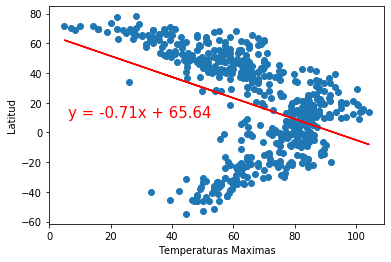

R squared: 0.005145890428697382


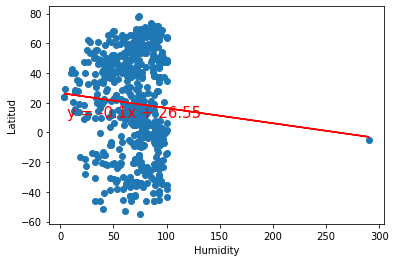

R squared: 0.00017490447266248392


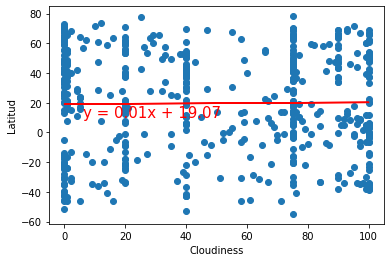

R squared: 0.002009358649470085


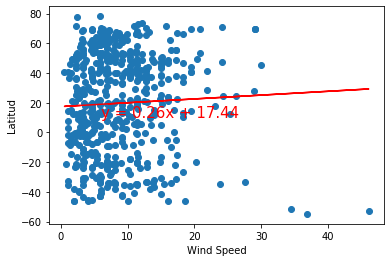

In [12]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
#x_values = census_data_complete['Poverty Rate'].astype('float')
#y_values = census_data_complete['Bank Count'].astype('float')

x_values = cities_df['Max Temp']
y_values = cities_df['Lat'] 
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Temperaturas Maximas')
plt.ylabel('Latitud')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

#-------------------------------------------------------------------------------------------
# Run linear regression

x_values = cities_df['Humidity']
y_values = cities_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Humidity')
plt.ylabel('Latitud')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()
#---------------------------------------------------------------------------------

x_values = cities_df['Cloudiness']
y_values = cities_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Cloudiness')
plt.ylabel('Latitud')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()
#------------------------------------------------------------------------------------------
x_values = cities_df['Wind Speed']
y_values = cities_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Wind Speed')
plt.ylabel('Latitud')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.6644951847801386


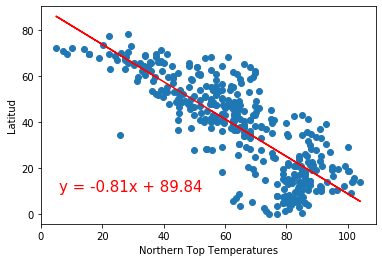

R squared: 0.010729512501511098


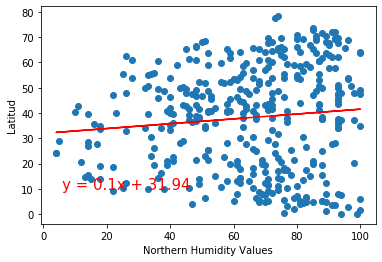

R squared: 0.007627485925231671


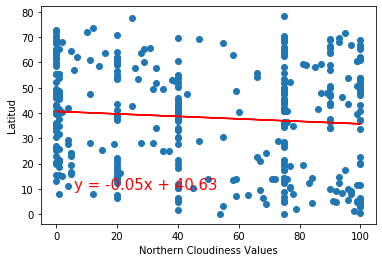

R squared: 0.011478610492563561


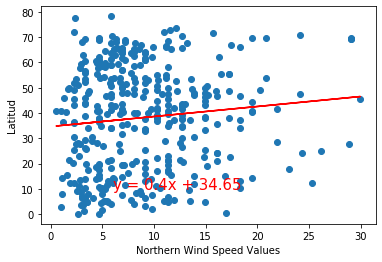

R squared: 0.5780003690343855


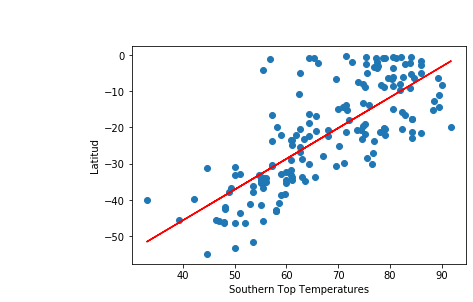

R squared: 0.021578062952091134


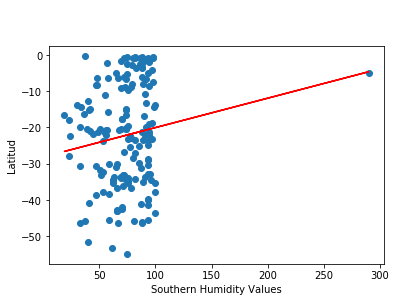

R squared: 0.047879684291709905


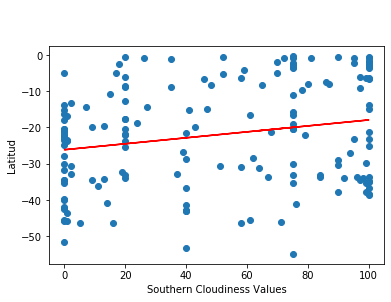

R squared: 0.10399533504138529


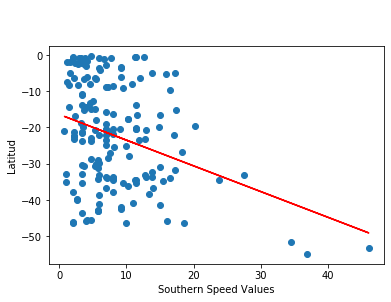

In [12]:
# Create a set of random lat and lng combinations
#lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
#lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
#lat_lngs = zip(lats, lngs)
#Northern Hemisphere (greater than or equal to 0 degrees latitude) 
#and Southern Hemisphere (less than 0 degrees latitude):

#NthrnH = np.random.uniform(lat_range[0], lat_range[78.22], size=1500)
#SthrnH = np.random.uniform(lng_range[0], lng_range[-54.81], size=1500)

NthrnH_L = cities_df[cities_df['Lat'] >= 0]
SthrnH_L = cities_df[cities_df['Lat'] < 0]

#lat_lngs = zip(lats, lngs)

#NthrnH_L = []
#SthrnH_L = []
 #for i in range(len(cities_df[n])):
 #           if(cities_df[n].iloc[i] < lower_bound) | (tumor_vol[n].iloc[i] > upper_bound):
 #               SthrnH_L.append(cities_df[n])
#for n in range(len(cities_df[n])):
#            if(cities_df[n] < 0):
#                SthrnH_L.append(cities_df[n])

x_values = NthrnH_L['Max Temp']
y_values = NthrnH_L['Lat'] 
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Northern Top Temperatures')
plt.ylabel('Latitud')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

#-------------------------------------------------------------------------------------------
# Run linear regression

x_values = NthrnH_L['Humidity']
y_values = NthrnH_L['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Northern Humidity Values')
plt.ylabel('Latitud')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()
#---------------------------------------------------------------------------------

x_values = NthrnH_L['Cloudiness']
y_values = NthrnH_L['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Northern Cloudiness Values')
plt.ylabel('Latitud')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()
#------------------------------------------------------------------------------------------
x_values = NthrnH_L['Wind Speed']
y_values = NthrnH_L['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Northern Wind Speed Values')
plt.ylabel('Latitud')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

#---------------------------------------------------------------------------------------------------------
x_values = SthrnH_L['Max Temp']
y_values = SthrnH_L['Lat'] 
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Southern Top Temperatures')
plt.ylabel('Latitud')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

#-------------------------------------------------------------------------------------------
# Run linear regression

x_values = SthrnH_L['Humidity']
y_values = SthrnH_L['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Southern Humidity Values')
plt.ylabel('Latitud')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()
#---------------------------------------------------------------------------------

x_values = SthrnH_L['Cloudiness']
y_values = SthrnH_L['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Southern Cloudiness Values')
plt.ylabel('Latitud')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()
#------------------------------------------------------------------------------------------
x_values = SthrnH_L['Wind Speed']
y_values = SthrnH_L['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Southern Speed Values')
plt.ylabel('Latitud')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
# Convert to DataFrame
#cities_df
cities_df.dtypes
#output_data_file_pd# = pd.DataFrame(output_data_file)

City_ID        object
City           object
Cloudiness    float64
Country        object
Date           object
Humidity      float64
Lat           float64
Lng            object
Max Temp      float64
Wind Speed    float64
dtype: object

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
cities_df_LHum = cities_df[cities_df['Humidity'] < 100]
cities_df_LHum

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2.0,RU,1558378754,72.0,68.05,39.51,37.50,7.16
1,1,mahebourg,75.0,MU,1558378503,74.0,-20.41,57.7,78.80,11.41
2,2,qaanaaq,25.0,GL,1558378755,73.0,77.48,-69.36,22.20,2.37
3,3,zhuhai,0.0,CN,1558378755,39.0,40.71,112.04,44.60,4.47
4,4,cape town,20.0,ZA,1558378755,76.0,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0.0,SY,1558378840,32.0,33.97,36.66,80.60,8.05
544,544,paraiso,5.0,MX,1558378898,4.0,24.01,-104.61,84.20,16.11
545,545,veraval,0.0,FR,1558378898,62.0,49.65,0.71,61.00,8.05
546,546,novyy urgal,100.0,RU,1558378899,93.0,51.07,132.56,49.74,2.68


In [47]:
#  Get the indices of cities that have humidity over 100%.
#Record for cities with Humidity values > 100 %
cities_df[cities_df['Humidity'] > 100]

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
129,129,paita,0.0,PE,1558378778,290.0,-5.09,-81.11,62.6,17.22


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cleansed_cities_df = 
#Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
#Perform a weather check on each of the cities using a series of successive API calls.
#Include a print log of each city as it's being processed with the city number and city name.
#Save a CSV of all retrieved data and a PNG image for each scatter plot.


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

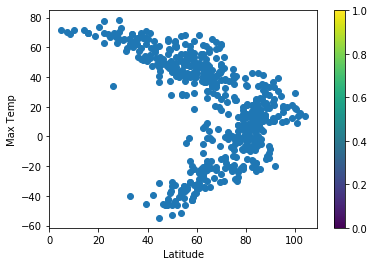

In [37]:

#Temperature (F) vs. Latitude

# Max Temp 
plt.scatter(cities_df['Max Temp'],cities_df['Lat']) #c=cities_df['Max Temp']  RGBA values should be within 0-1 range
clb = plt.colorbar()
plt.xlabel("Latitude")
plt.ylabel('Max Temp')
plt.show()
#-----------

## Latitude vs. Humidity Plot

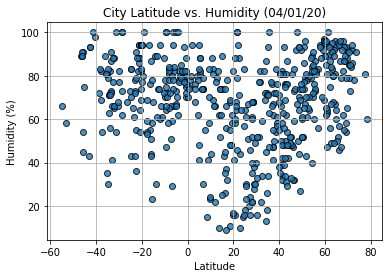

## Latitude vs. Cloudiness Plot

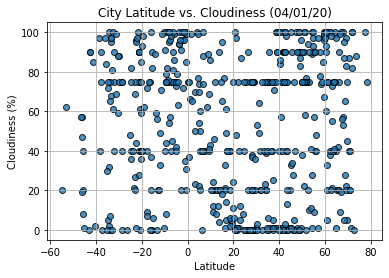

## Latitude vs. Wind Speed Plot

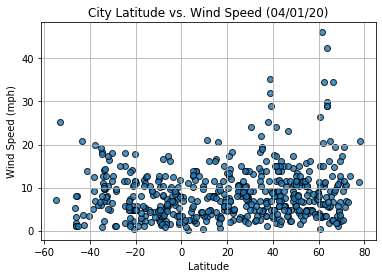

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


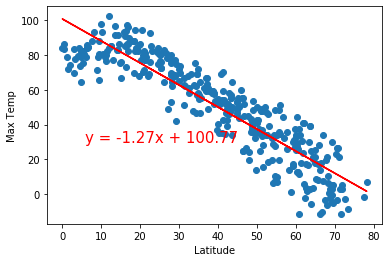

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


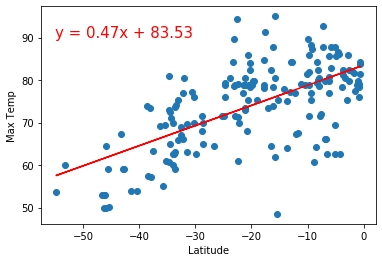

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


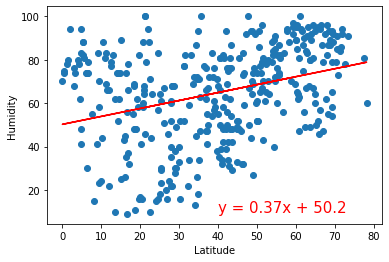

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


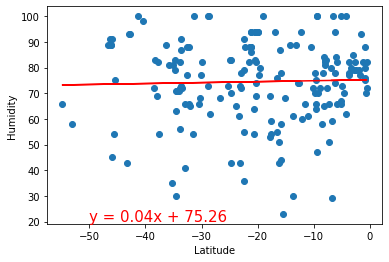

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


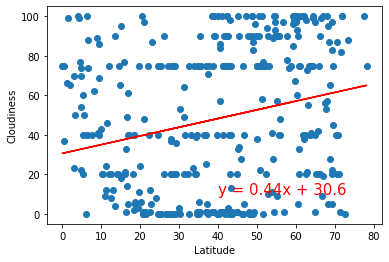

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


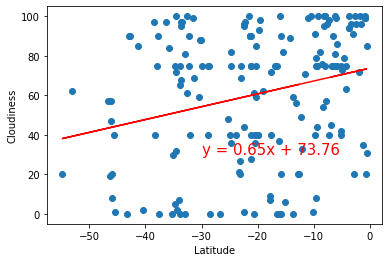

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


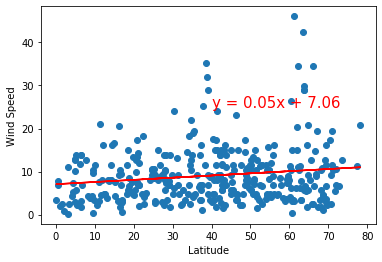

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


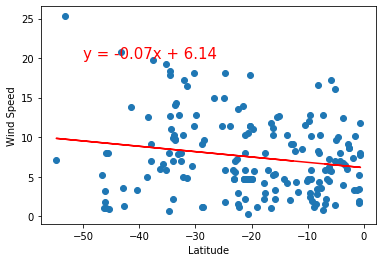

In [17]:
#cities_df
#cities_df[['City','Lat','Lng']]
#cities_df_La_Lo = cities_df[['Lat','Lng']]
cities_df_La_Lo = cities_df[['City','Lat','Lng']]
cities_df_La_Lo

,City,Lat,Lng
0,ostrovnoy,68.05,39.51
1,mahebourg,-20.41,57.7
2,qaanaaq,77.48,-69.36
3,zhuhai,40.71,112.04
4,cape town,-33.93,18.42
...,...,...,...
543,yabrud,33.97,36.66
544,paraiso,24.01,-104.61
545,veraval,49.65,0.71
546,novyy urgal,51.07,132.56


In [18]:
#cities_df_La_Lo
unique_cities_df_Lat = cities_df['Lat'].unique
unique_cities_df_Lon = cities_df['Lng'].unique
#unique_cities_df_Lon 

In [29]:
#pwd
unk_cities_df = cities_df.drop_duplicates(subset = ['Lat','Lng'])
unk_cities_df.dtypes

City_ID        object
City           object
Cloudiness    float64
Country        object
Date           object
Humidity      float64
Lat           float64
Lng            object
Max Temp      float64
Wind Speed    float64
dtype: object

In [35]:
#unk_cities_df.to_csv("output_data/cities_weather.csv")

#with open('loop.csv','w') as f1:
#    writer=csv.writer(f1, delimiter='\t',lineterminator='\n',)
##    for i in range(0,10):
#       row = [i]
#       writer.writerow(row)
        
#with open('cities_weather.csv','w',newline='') as fp:
#    a = csv.writer(fp,delimiter=',')
#    data = unk_cities_d
#    a.writerows(data)

#with open('cities_weather.csv', 'wb') as myfile:
#    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
#    wr.writerow(unk_cities_df)
    

#'C:/Users/JERRY\\Documents\\DATA ANALYTICS\\TEC MTY\\API-challenge\\tdm-rev-data-pt-06-2020-u-c-master\\Week 6 - APIs\\Homework\\output_data)
#DocumentsDATA ANALYTICSTEC MTYAPI-challengetdm-rev-data-pt-06-2020-u-c-masterWeek 6 - APIsHomeworkoutput_data

In [34]:
#Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
#Perform a weather check on each of the cities using a series of successive API calls.
unk_city_lat_lngs = []

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name


for lat_lng in lat_lngs:
    city = citipy.nearest_city(unk_city_lat_lngs[0], unk_city_lat_lngs[1]).city_name